In [52]:
import pandas as pd
import geopandas as gpd

import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np

In [53]:
# # Define a function to identify the airport by its code
# def identify_airport(row):
#     airport = airport_data[airport_data['iata_code'] == row]['name']
#     return airport.values[0] if not airport.empty else row

# # Define a dictionary to map airline codes to their names
# abbr_companies = flights_data[['OP_CARRIER', 'OP_CARRIER']].drop_duplicates().set_index('OP_CARRIER')['OP_CARRIER'].to_dict()

# # Compute the average departure delay by origin airport
# airport_mean_delays = flights_data[['ORIGIN', 'DEP_DELAY']].groupby('ORIGIN').mean()

# # Replace the airport codes with their names
# airport_mean_delays.index = airport_mean_delays.index.map(identify_airport)

# # Create the heatmap
# sns.set(context="paper")
# fig = plt.figure(1, figsize=(12,12))

# ax = fig.add_subplot(1,2,1)
# subset = airport_mean_delays.iloc[:50,:]
# mask = subset.isnull()
# sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
# plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88)
# ax.yaxis.label.set_visible(False)
# ax.set_title('Scale of Delays from Origin Airport (Top 50)')

# ax = fig.add_subplot(1,2,2)
# subset = airport_mean_delays.iloc[50:100,:]
# mask = subset.isnull()
# sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30)
# plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88)
# ax.yaxis.label.set_visible(False)
# ax.set_title('Scale of Delays from Origin Airport (50-100)')

# plt.tight_layout()
# plt.show()


<AxesSubplot:xlabel='DEST', ylabel='ORIGIN'>

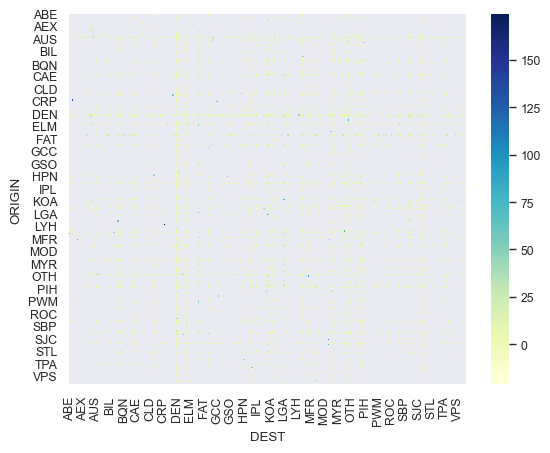

In [ ]:
# Load the dataset
df = pd.read_csv("../data/csv/2009.csv")

# Group the data by the origin airport and calculate the mean delay time
delay_by_origin = df.groupby("ORIGIN")["DEP_DELAY"].mean()

# Create a pivot table with origin airports as rows, destination airports as columns, and delay time as values
pivot_table = pd.pivot_table(df, values="DEP_DELAY", index="ORIGIN", columns="DEST", aggfunc="mean")

# Create a heatmap using seaborn
sns.heatmap(pivot_table, cmap="YlGnBu")


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/csv/2009.csv")

# Group the data by the origin airport and calculate the mean delay time
delay_by_origin = df.groupby("ORIGIN")["DEP_DELAY"].mean()

# Create a pivot table with origin airports as rows, destination airports as columns, and delay time as values
pivot_table = pd.pivot_table(df, values="DEP_DELAY", index="ORIGIN", columns="DEST", aggfunc="mean")

# Rename the airlines with their respective abbreviations
abbr_companies = {
    '9E':'Endeavor Air',
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'B6':'JetBlue Airways',
    'DL':'Delta Air Lines',
    'EV':'ExpressJet Airlines',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'UA':'United Airlines',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airlines',
    'YX':'Republic Airways'
}


In [55]:
df = pd.read_csv('../data/csv/2009.csv')

In [2]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
print(df.duplicated().sum())


510852


In [19]:
nas_delay_values = df.loc[~df['LATE_AIRCRAFT_DELAY'].isnull() & df['LATE_AIRCRAFT_DELAY'] != False, 'LATE_AIRCRAFT_DELAY']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['LATE_AIRCRAFT_DELAY'].unique().round(2)


169         15.0
185         27.0
202         68.0
215         35.0
225         17.0
           ...  
6428734     56.0
6428743    169.0
6428744     37.0
6428750     16.0
6428965     39.0
Name: LATE_AIRCRAFT_DELAY, Length: 532994, dtype: float64


array([      nan, 0.000e+00, 1.500e+01, 2.700e+01, 6.800e+01, 3.500e+01,
       1.700e+01, 4.300e+01, 2.400e+01, 1.200e+01, 1.800e+01, 8.000e+00,
       6.200e+01, 1.880e+02, 1.190e+02, 2.500e+01, 5.700e+01, 1.410e+02,
       1.510e+02, 3.900e+01, 2.100e+01, 1.440e+02, 2.300e+01, 1.240e+02,
       4.600e+01, 2.800e+01, 2.000e+00, 4.000e+01, 5.500e+01, 4.500e+01,
       7.000e+01, 6.000e+01, 5.000e+01, 5.000e+00, 1.000e+01, 4.700e+01,
       4.000e+00, 1.050e+02, 1.000e+00, 1.400e+01, 4.900e+01, 1.100e+01,
       3.000e+00, 1.600e+01, 4.200e+01, 3.000e+01, 2.200e+01, 8.400e+01,
       7.900e+01, 3.300e+01, 5.600e+01, 2.430e+02, 2.440e+02, 7.600e+01,
       6.500e+01, 2.600e+01, 3.400e+01, 1.060e+02, 1.670e+02, 1.900e+01,
       8.000e+01, 5.900e+01, 3.600e+01, 4.400e+01, 6.400e+01, 7.000e+00,
       2.330e+02, 1.040e+02, 4.100e+01, 2.900e+01, 3.200e+01, 8.100e+01,
       3.100e+01, 1.300e+01, 9.000e+00, 6.300e+01, 2.490e+02, 2.000e+01,
       8.700e+01, 1.620e+02, 6.000e+00, 9.200e+01, 

In [ ]:
%%timeit
# df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['FL_DATE'] = df['FL_DATE'].apply(pd.Timestamp)
df['ORIGIN'] = df['ORIGIN'].apply(str)
df['TAXI_OUT'] = df['TAXI_OUT'].apply(float)

6.56 s ± 446 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# Use pd.to_datetime, pd.to_numeric
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['TAXI_OUT'] = pd.to_numeric(df['TAXI_OUT'])

72.4 ms ± 9.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# Use astype()
df['FL_DATE'] = df['FL_DATE'].astype('datetime64[ns]')
df['ORIGIN'] = df['ORIGIN'].astype('str')
df['TAXI_OUT'] = df['TAXI_OUT'].astype('float')

109 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
    #    'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
    #    'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
    #    'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
    #    'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
    #    'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
    #    'Unnamed: 27'],
    #   dtype='object')

In [ ]:
nas_delay_values = df.loc[~df['WEATHER_DELAY'].isnull() & df['WEATHER_DELAY'] != False, 'WEATHER_DELAY']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['WEATHER_DELAY'].unique()

15          27.0
1091       162.0
1144        20.0
1284        99.0
1300       130.0
           ...  
6429273     36.0
6429278     53.0
6429285     81.0
6429306     55.0
6429310     20.0
Name: WEATHER_DELAY, Length: 73851, dtype: float64


array([      nan, 2.700e+01, 0.000e+00, 1.620e+02, 2.000e+01, 9.900e+01,
       1.300e+02, 9.400e+01, 1.100e+02, 4.500e+01, 2.500e+01, 2.600e+01,
       5.000e+01, 7.000e+01, 4.300e+01, 1.200e+02, 6.800e+01, 3.100e+01,
       2.370e+02, 3.700e+01, 5.500e+01, 2.300e+01, 3.600e+01, 1.800e+01,
       9.000e+00, 2.100e+01, 1.700e+01, 3.300e+01, 1.900e+01, 5.700e+01,
       1.500e+01, 7.000e+00, 4.700e+01, 4.100e+01, 3.400e+01, 2.400e+01,
       5.600e+01, 5.000e+00, 2.800e+01, 1.600e+01, 6.000e+00, 3.000e+00,
       2.000e+00, 5.100e+01, 1.400e+01, 5.760e+02, 5.900e+01, 2.790e+02,
       1.730e+02, 1.050e+02, 1.330e+02, 1.160e+02, 3.800e+01, 4.200e+01,
       1.000e+02, 1.410e+02, 1.110e+02, 6.200e+01, 5.800e+01, 1.670e+02,
       1.240e+02, 1.200e+01, 1.100e+01, 2.200e+01, 4.400e+01, 1.450e+02,
       4.000e+00, 4.000e+01, 8.600e+01, 1.000e+01, 1.000e+00, 8.000e+00,
       5.200e+01, 4.900e+01, 3.500e+01, 3.000e+01, 4.600e+01, 2.900e+01,
       6.900e+01, 7.600e+01, 4.800e+01, 4.040e+02, 

In [ ]:
nas_delay_values = df.loc[~df['Unnamed: 27'].isnull() & df['Unnamed: 27'] != False, 'Unnamed: 27']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['Unnamed: 27'].unique()

Series([], Name: Unnamed: 27, dtype: float64)


array([nan])

In [ ]:
nas_delay_values = df.loc[~df['LATE_AIRCRAFT_DELAY'].isnull() & df['LATE_AIRCRAFT_DELAY'] != False, 'LATE_AIRCRAFT_DELAY']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['LATE_AIRCRAFT_DELAY'].unique()

In [18]:
nas_delay_values = df.loc[~df['CANCELLED'].isnull() & df['CANCELLED'] != False, 'CANCELLED']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['CANCELLED'].unique()

879        1.0
926        1.0
935        1.0
938        1.0
941        1.0
          ... 
6429092    1.0
6429170    1.0
6429268    1.0
6429272    1.0
6429276    1.0
Name: CANCELLED, Length: 87038, dtype: float64


array([0., 1.])

In [19]:
nas_delay_values = df.loc[~df['CANCELLATION_CODE'].isnull() & df['CANCELLATION_CODE'] != False, 'CANCELLATION_CODE']
print(nas_delay_values)
# cancel_code = df['CANCELLATION_CODE']
df['CANCELLATION_CODE'].unique()

879        A
926        A
935        A
938        B
941        B
          ..
6429092    A
6429170    B
6429268    B
6429272    B
6429276    B
Name: CANCELLATION_CODE, Length: 87038, dtype: object


array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [20]:
nas_delay_count = df['NAS_DELAY'].sum()
nas_delay_nan_count = df['NAS_DELAY'].isna().sum()

print("Number of NaN values in NAS_DELAY column:", nas_delay_nan_count)

Number of NaN values in NAS_DELAY column: 5258837


In [21]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429338 entries, 0 to 6429337
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [23]:
df.describe

<bound method NDFrame.describe of            FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
0       2009-01-01         XE               1204    DCA  EWR          1100   
1       2009-01-01         XE               1206    EWR  IAD          1510   
2       2009-01-01         XE               1207    EWR  DCA          1100   
3       2009-01-01         XE               1208    DCA  EWR          1240   
4       2009-01-01         XE               1209    IAD  EWR          1715   
...            ...        ...                ...    ...  ...           ...   
6429333 2009-12-31         YV               2846    YUM  PHX           615   
6429334 2009-12-31         YV               2850    YUM  PHX          1929   
6429335 2009-12-31         YV               2866    YUM  PHX          1400   
6429336 2009-12-31         YV               2868    YUM  PHX          1620   
6429337 2009-12-31         YV               2871    YUM  PHX          1123   

         DEP_TIME  DEP_DELAY 

In [24]:
airports_data = pd.read_csv('../data/us-airports.csv')
clean_airports= airports_data[1:]

FileNotFoundError: [Errno 2] No such file or directory: '../data/us-airports.csv'

In [ ]:
clean_airports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [ ]:
clean_airports.head()